# 혈색소 예측

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rc('font', family = 'Malgun Gothic')

**건강검진 데이터 불러오기**

In [3]:
health = pd.read_csv('health.csv')

In [4]:
health.describe(include = "all")

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999597.000000,999805.000000,999812.000000,...,994470.000000,999834.000000,644918.000000,1000000.000000,397680.000000,1000000,1000000,1000000,397680.000000,1000000.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,미시행,미시행,미시행,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1000000,1000000,1000000,NaN,NaN
mean,2019.0,500000.500000,33.712386,1.480426,10.496387,162.307655,63.564490,81.320565,0.971909,0.970951,...,36.294294,1.369669,0.999972,0.397680,0.210068,NaN,NaN,NaN,0.587523,20191231.0
std,0.0,288675.278933,12.668197,0.499617,2.964080,9.280317,12.877611,10.523122,0.593307,0.600537,...,48.390706,0.482715,0.005283,0.489419,0.407357,NaN,NaN,NaN,0.589261,0.0
min,2019.0,1.000000,11.000000,1.000000,5.000000,130.000000,30.000000,3.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,20191231.0
25%,2019.0,250000.750000,27.000000,1.000000,8.000000,155.000000,55.000000,74.000000,0.700000,0.700000,...,16.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,20191231.0
50%,2019.0,500000.500000,41.000000,1.000000,11.000000,160.000000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,20191231.0
75%,2019.0,750000.250000,43.000000,2.000000,13.000000,170.000000,70.000000,88.000000,1.200000,1.200000,...,39.000000,2.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000,20191231.0


In [5]:
health.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [6]:
print(health.columns)

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')


**불필요한 변수 제거**

In [7]:
health = health.drop(['기준년도'], axis = 1)
health = health.drop(['가입자 일련번호'], axis = 1)
health = health.drop(['시도코드'], axis = 1)
health = health.drop(['총 콜레스테롤'], axis = 1)
health = health.drop(['트리글리세라이드'], axis = 1)
health = health.drop(['HDL 콜레스테롤'], axis = 1)
health = health.drop(['LDL 콜레스테롤'], axis = 1)
health = health.drop(['요단백'], axis = 1)
health = health.drop(['혈청크레아티닌'], axis = 1)
health = health.drop(['(혈청지오티)AST'], axis = 1)
health = health.drop(['(혈청지오티)ALT'], axis = 1)
health = health.drop(['감마 지티피'], axis = 1)
health = health.drop(['구강검진 수검여부'], axis = 1)
health = health.drop(['치아우식증유무'], axis = 1)
health = health.drop(['결손치 유무'], axis = 1)
health = health.drop(['치아마모증유무'], axis = 1)
health = health.drop(['제3대구치(사랑니) 이상'], axis = 1)
health = health.drop(['치석'], axis = 1)
health = health.drop(['데이터 공개일자'], axis = 1)

In [8]:
print(health.columns)

Index(['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '혈색소',
       '흡연상태', '음주여부'],
      dtype='object')


In [9]:
health.columns = ['Sex', 'Age', 'Height', 'Weight', 'Waist', 'sight_L', 
                  'sight_R','Hear_L', 'Hear_R', 'BP_high', 'BP_lwst',
                 'Blds', 'Hmg', 'SMK', 'DRK']

In [10]:
print(health.columns)

Index(['Sex', 'Age', 'Height', 'Weight', 'Waist', 'sight_L', 'sight_R',
       'Hear_L', 'Hear_R', 'BP_high', 'BP_lwst', 'Blds', 'Hmg', 'SMK', 'DRK'],
      dtype='object')


In [11]:
health.head()
#14개의 반응변수

,Sex,Age,Height,Weight,Waist,sight_L,sight_R,Hear_L,Hear_R,BP_high,BP_lwst,Blds,Hmg,SMK,DRK
0,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,15.5,2.0,NaN
1,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,14.0,1.0,1.0
2,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,15.6,1.0,1.0
3,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,14.5,2.0,1.0
4,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,14.9,2.0,NaN


**결측값 확인**

In [12]:
print(pd.isnull(health).sum())

Sex             0
Age             0
Height          0
Weight          0
Waist         403
sight_L       195
sight_R       188
Hear_L        181
Hear_R        178
BP_high      5424
BP_lwst      5425
Blds         5523
Hmg          5532
SMK           166
DRK        355082
dtype: int64


**변수 간 상관관계**

종속변수(Hmg)와 상관관계 있는 것

종속변수(Hmg)와 상관계수

음의 상관계수 : 성별(-0.66)

양의 상관계수 : 신장(0.52), 몸무게(0.49), 흡연여부(0.44)

C:\Users\choim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

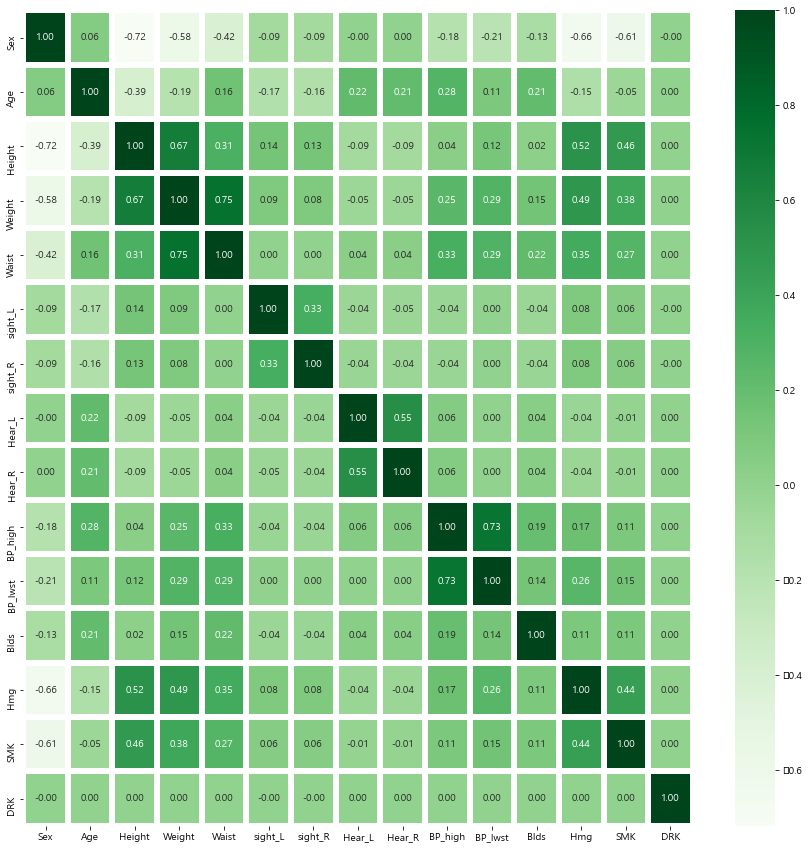

In [14]:
plt.figure(figsize = (15, 15))
sns.heatmap(data = health.corr(), annot = True, fmt = '.2f', 
            linewidths = 5, cmap = 'Greens')

**EDA**

**종속변수(혈색소)**

결측값이 있는 행 모두 제거

In [15]:
health.dropna(subset=['Hmg'], how='all', inplace=True)

In [16]:
print(pd.isnull(health['Hmg']).sum())

0


C:\Users\choim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


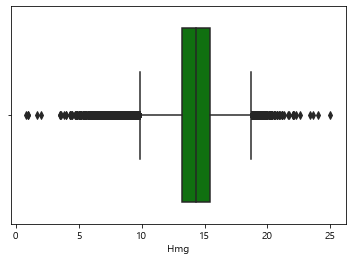

In [17]:
sns.boxplot(health['Hmg'], color = 'green')
plt.show()

이상치 제거

In [18]:
health['Hmg'].min()

0.8

In [19]:
health['Hmg'].max()

25.0

혈색소 수치가 7 미만인 경우 삭제

In [20]:
idx_1 = health[health['Hmg'] < 7].index

In [21]:
health_1 = health.drop(idx_1)

혈색소 수치가 20초과인 경우 삭제

In [22]:
idx_2 = health_1[health_1['Hmg'] > 20].index

In [23]:
health_2 = health_1.drop(idx_2)

In [24]:
health_2['Hmg']

0         15.5
1         14.0
2         15.6
3         14.5
4         14.9
          ... 
999995    15.7
999996    15.4
999997    15.9
999998    15.3
999999    13.2
Name: Hmg, Length: 993991, dtype: float64

C:\Users\choim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


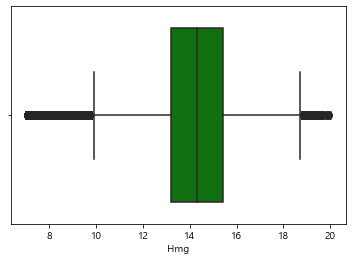

In [25]:
sns.boxplot(health_2['Hmg'], color = 'green')
plt.show()

혈색소 수치 7-12 : 낮음, 12-17 : 정상, 17이상 : 과다

In [26]:
bins = [7, 12, 17]

np.digitize(health_2['Hmg'], bins)
health_2['Hmg'] = np.digitize(health_2['Hmg'], bins)

In [27]:
health_2['Hmg']

0         2
1         2
2         2
3         2
4         2
         ..
999995    2
999996    2
999997    2
999998    2
999999    2
Name: Hmg, Length: 993991, dtype: int64

<AxesSubplot:xlabel='Hmg', ylabel='count'>

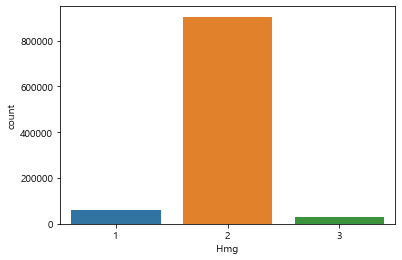

In [28]:
sns.countplot(x = 'Hmg', data = health_2)

**독립변수**

성별 변수

여자가 남자에 비해 혈색소 수치가 낮은 경우가 많고, 남자가 여자에 비해 혈색소 수치가 높은 경우가 많다.

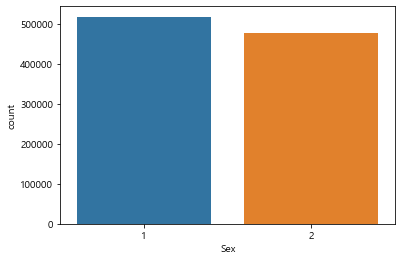

In [29]:
sns.countplot(x = "Sex", data = health_2)
plt.show()

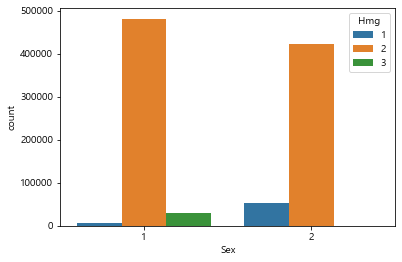

In [30]:
sns.countplot(x = "Sex", data = health_2, hue = "Hmg")
plt.show()

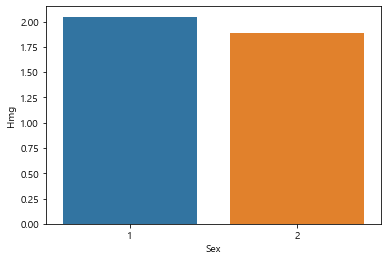

In [31]:
sns.barplot(x = "Sex", y = "Hmg", data = health_2)
plt.show()

나이 변수

5 : 20-24세 6 : 25-29세 7 : 30-34세 8 : 35-39세 9 : 40-44세 10 : 45-49세 11 : 50-54세 12 : 55-59세 13 : 60-64세 14 : 65-69세 15 : 70-74세 16 : 75-79세 17 : 80-84세 18 : 85세~

20대 : 1, 30대 : 2, 40대 : 3, 50대 : 4, 60대 : 5, 70대 : 6, 80세 이상 : 7

In [32]:
bins = [5, 7, 9, 11, 13, 15, 17]

np.digitize(health_2['Age'], bins)
health_2['Age'] = np.digitize(health_2['Age'], bins)

In [33]:
health['Age']

0         13
1          5
2         13
3         12
4         10
          ..
999995    12
999996     9
999997    13
999998     8
999999    10
Name: Age, Length: 994468, dtype: int64

In [34]:
health_2['Age']

0         5
1         1
2         5
3         4
4         3
         ..
999995    4
999996    3
999997    5
999998    2
999999    3
Name: Age, Length: 993991, dtype: int64

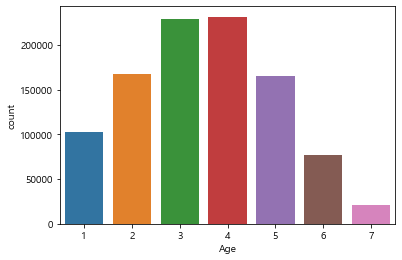

In [35]:
sns.countplot(x = "Age", data = health_2)
plt.show()

80세 이상의 경우 비교적 혈색소 수치가 낮지만, 연령에 따른 혈색소 수치의 관계는 없어보인다.

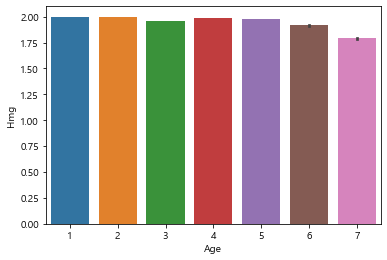

In [36]:
sns.barplot(x = "Age", y = "Hmg", data = health_2)
plt.show()

신장

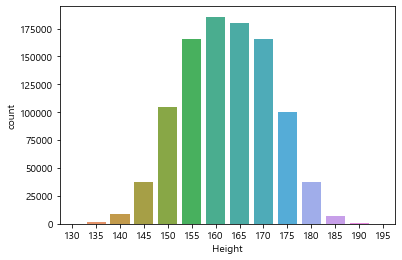

In [37]:
sns.countplot(x = "Height", data = health_2)
plt.show()

근소하지만 키가 클수록 혈색소 수치가 높다.

<AxesSubplot:xlabel='Hmg', ylabel='Height'>

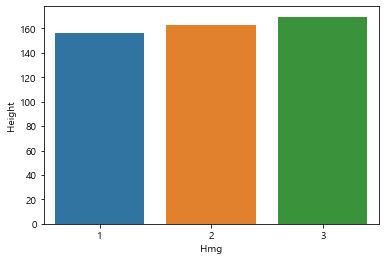

In [38]:
sns.barplot(x = "Hmg", y = "Height", data = health_2)

체중

<AxesSubplot:xlabel='Weight', ylabel='count'>

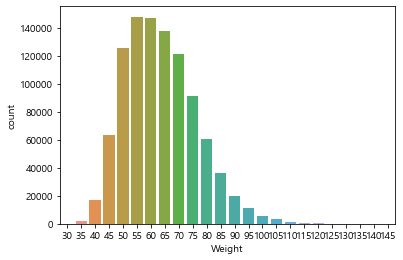

In [39]:
sns.countplot(x = "Weight", data = health_2)

체중이 높을수록 혈색소 수치가 높다.

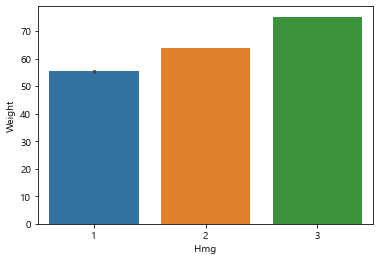

In [40]:
sns.barplot(x = "Hmg", y = "Weight", data = health_2)
plt.show()

Weight 변수 범주화

1 : 30-50, 2 : 50-70, 3 : 70-90, 4 : 90-110, 5 : 110-

In [41]:
print(health_2['Weight'].min())
print(health_2['Weight'].max())

30
145


In [42]:
bins = [30, 50, 70, 90, 110]

np.digitize(health_2['Weight'], bins)
health_2['Weight'] = np.digitize(health_2['Weight'], bins)

In [44]:
health_2['Weight']

0         2
1         1
2         3
3         2
4         3
         ..
999995    2
999996    2
999997    2
999998    3
999999    2
Name: Weight, Length: 993991, dtype: int64

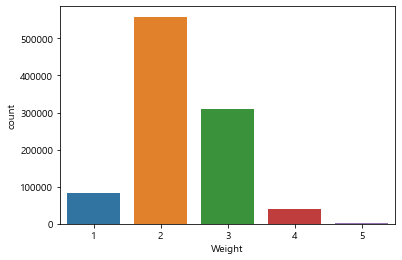

In [45]:
sns.countplot(x = 'Weight', data = health_2)
plt.show()

허리둘레

결측치 처리

<AxesSubplot:xlabel='Weight', ylabel='Waist'>

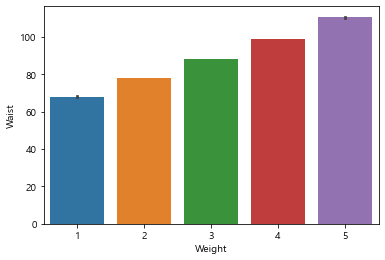

In [46]:
sns.barplot(x = "Weight", y = "Waist", data = health_2)

체중 별 허리둘레의 중앙값을 Waist변수의 결측치에 대입한다.

In [47]:
health_2.groupby(['Weight'])['Waist'].median()

Weight
1     67.0
2     78.0
3     88.0
4     99.0
5    110.0
Name: Waist, dtype: float64

In [48]:
health_2["Waist"].fillna(health_2.groupby("Weight")["Waist"].transform("median"),
                  inplace = True)

In [49]:
print(pd.isnull(health_2['Waist']).sum())

0


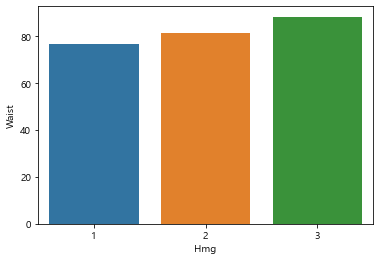

In [50]:
sns.barplot(x = health_2['Hmg'], y = health_2['Waist'])
plt.show()

시력(좌)

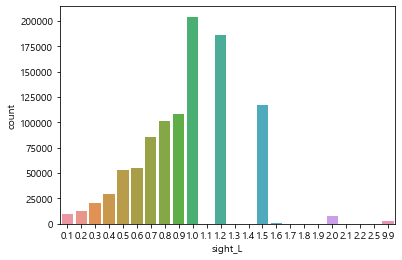

In [51]:
sns.countplot(x = "sight_L", data = health_2)
plt.show()

시력은 예측할 수 있는 것이 없어서 좌 시력의 결측치를 지운다.

In [52]:
health_2.dropna(subset=['sight_L'], how='all', inplace=True)

In [53]:
print(pd.isnull(health_2['sight_L']).sum())

0


그래프를 봤을 때 9.9의 값은 실명이나 맹인을 뜻하므로 0.0으로 변경해준다.

In [55]:
health_2['sight_L'] = health_2['sight_L'].replace(9.9, 0.0)

<AxesSubplot:xlabel='sight_L', ylabel='count'>

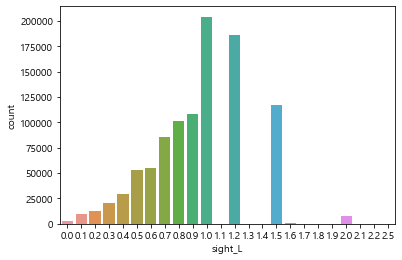

In [56]:
sns.countplot(x = "sight_L", data = health_2)

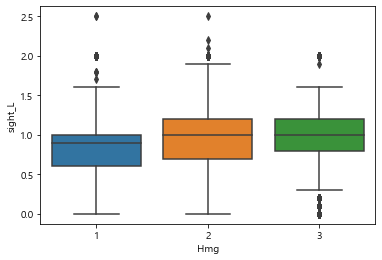

In [57]:
sns.boxplot(x = health_2['Hmg'], y = health_2['sight_L'])
plt.show()

시력(우)

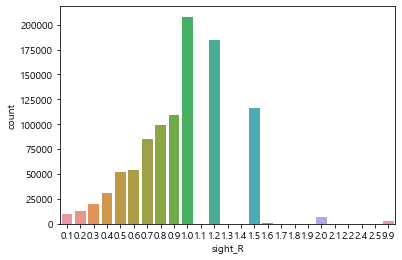

In [58]:
sns.countplot(x = "sight_R", data = health_2)
plt.show()

In [59]:
health_2.dropna(subset=['sight_R'], how='all', inplace=True)

In [60]:
print(pd.isnull(health_2['sight_R']).sum())

0


In [61]:
health_2['sight_R'] = health_2['sight_R'].replace(9.9, 0.0)

<AxesSubplot:xlabel='sight_R', ylabel='count'>

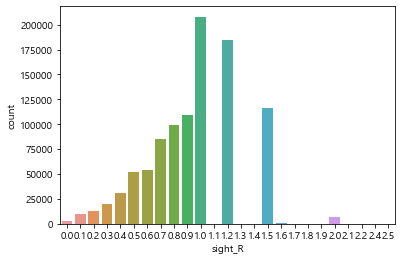

In [62]:
sns.countplot(x = "sight_R", data = health_2)

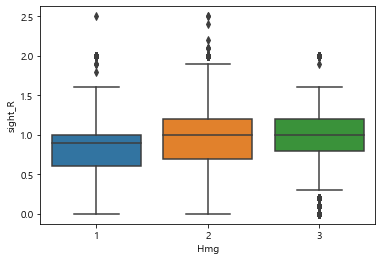

In [63]:
sns.boxplot(x = health_2['Hmg'], y = health_2['sight_R'])
plt.show()

청력(좌)

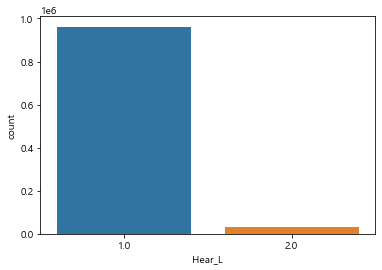

In [64]:
sns.countplot(x = "Hear_L", data = health_2)
plt.show()

In [65]:
health_2['Hear_L'] = health_2['Hear_L'].fillna(1.0)

In [66]:
print(pd.isnull(health_2['Hear_L']).sum())

0


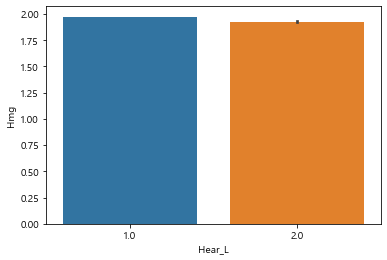

In [67]:
sns.barplot(x = health_2['Hear_L'], y = health_2['Hmg'])
plt.show()

청력(우)

<AxesSubplot:xlabel='Hear_R', ylabel='count'>

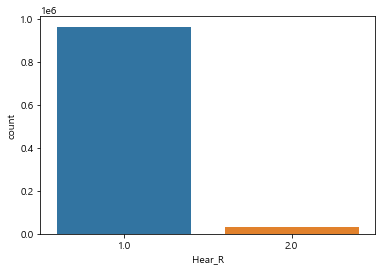

In [68]:
sns.countplot(x = "Hear_R", data = health_2)

In [69]:
health_2['Hear_R'] = health_2['Hear_R'].fillna(1.0)

In [70]:
print(pd.isnull(health_2['Hear_R']).sum())

0


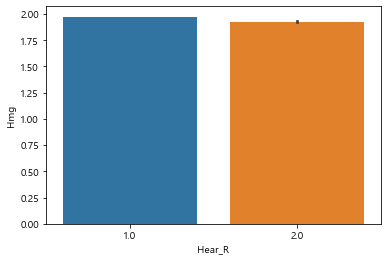

In [71]:
sns.barplot(x = health_2['Hear_R'], y = health_2['Hmg'])
plt.show()

수축기 혈압

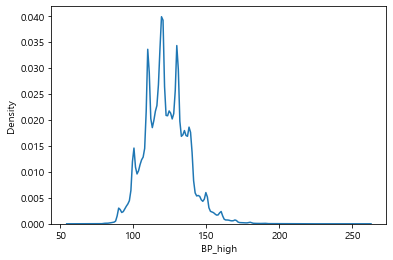

In [72]:
sns.kdeplot(x = "BP_high", data = health_2)
plt.show()

C:\Users\choim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BP_high', ylabel='Density'>

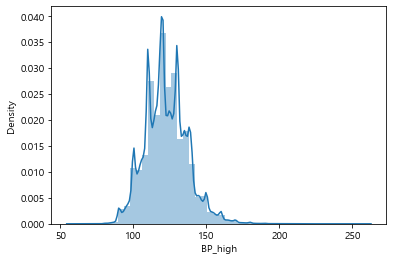

In [73]:
sns.distplot(health_2['BP_high'])

In [74]:
health_2['BP_high'].median()

121.0

In [75]:
median = health_2['BP_high'].median()
health_2['BP_high'] = health_2['BP_high'].fillna(median)

In [76]:
print(pd.isnull(health_2['BP_high']).sum())

0


<AxesSubplot:xlabel='Hmg', ylabel='BP_high'>

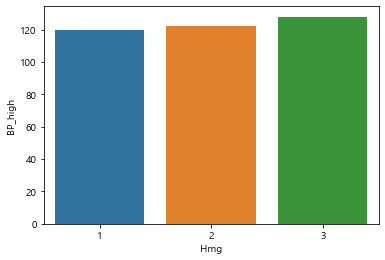

In [77]:
sns.barplot(x = health_2['Hmg'], y = health_2['BP_high'])

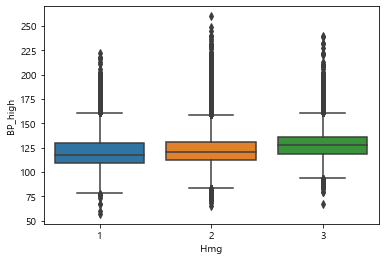

In [78]:
sns.boxplot(x = health_2['Hmg'], y = health_2['BP_high'])
plt.show()

이완기 혈압

<AxesSubplot:xlabel='BP_lwst', ylabel='Density'>

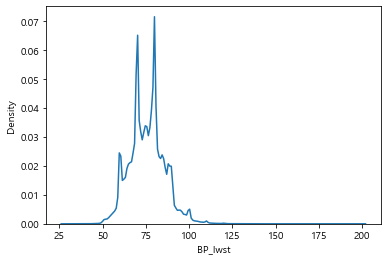

In [79]:
sns.kdeplot(x = "BP_lwst", data = health_2)

C:\Users\choim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BP_lwst', ylabel='Density'>

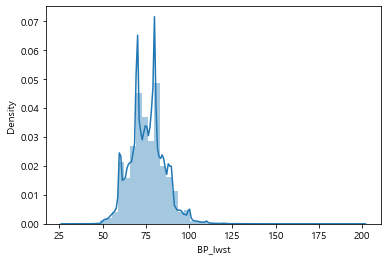

In [80]:
sns.distplot(health_2['BP_lwst'])

In [81]:
health_2['BP_lwst'].median()

76.0

In [82]:
median = health_2['BP_lwst'].median()
health_2['BP_lwst'] = health_2['BP_lwst'].fillna(median)

In [83]:
print(pd.isnull(health_2['BP_lwst']).sum())

0


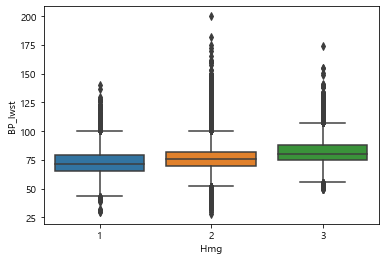

In [84]:
sns.boxplot(x = health_2['Hmg'], y = health_2['BP_lwst'])
plt.show()

공복혈당

<AxesSubplot:xlabel='Blds', ylabel='Density'>

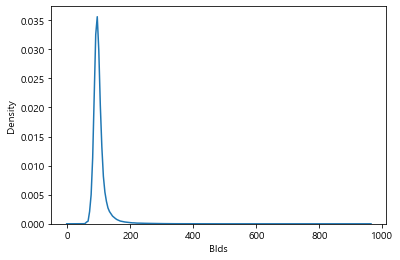

In [85]:
sns.kdeplot(x = "Blds", data = health_2)

In [86]:
health_2['Blds'].median()

96.0

In [87]:
median = health_2['Blds'].median()
health_2['Blds'] = health_2['Blds'].fillna(median)

In [88]:
print(pd.isnull(health_2['Blds']).sum())

0


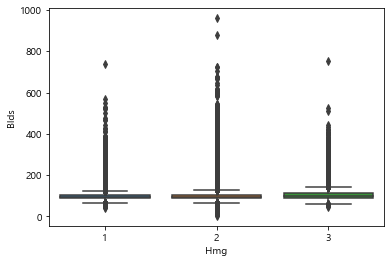

In [89]:
sns.boxplot(x = health_2['Hmg'], y = health_2['Blds'])
plt.show()

흡연상태

<AxesSubplot:xlabel='SMK', ylabel='count'>

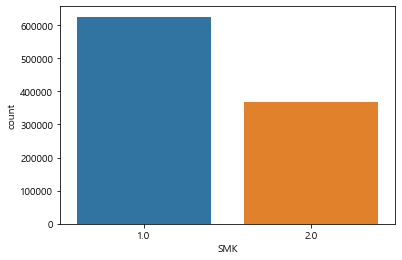

In [90]:
sns.countplot(x = 'SMK', data = health_2)
#피우지 않는 사람이 더 많다.

In [91]:
health_2 = health_2.drop(['SMK'], axis = 1)

음주여부

<AxesSubplot:xlabel='DRK', ylabel='count'>

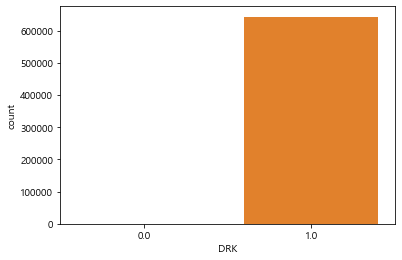

In [92]:
sns.countplot(x = 'DRK', data = health_2)
#다 마신다. -> 도움되지 않는 변수

In [93]:
health_2 = health_2.drop(['DRK'], axis = 1)

In [94]:
print(health_2.columns)

Index(['Sex', 'Age', 'Height', 'Weight', 'Waist', 'sight_L', 'sight_R',
       'Hear_L', 'Hear_R', 'BP_high', 'BP_lwst', 'Blds', 'Hmg'],
      dtype='object')


In [95]:
print(pd.isnull(health_2).sum())

Sex        0
Age        0
Height     0
Weight     0
Waist      0
sight_L    0
sight_R    0
Hear_L     0
Hear_R     0
BP_high    0
BP_lwst    0
Blds       0
Hmg        0
dtype: int64


In [96]:
health_2.dtypes

Sex          int64
Age          int64
Height       int64
Weight       int64
Waist      float64
sight_L    float64
sight_R    float64
Hear_L     float64
Hear_R     float64
BP_high    float64
BP_lwst    float64
Blds       float64
Hmg          int64
dtype: object

In [97]:
health_2 = health_2.astype({'Hear_R' : 'int'})
health_2 = health_2.astype({'Hear_L' : 'int'})
health_2 = health_2.astype({'BP_high' : 'int'})
health_2 = health_2.astype({'BP_lwst' : 'int'})
health_2 = health_2.astype({'Blds' : 'int'})

In [98]:
health_2.dtypes

Sex          int64
Age          int64
Height       int64
Weight       int64
Waist      float64
sight_L    float64
sight_R    float64
Hear_L       int32
Hear_R       int32
BP_high      int32
BP_lwst      int32
Blds         int32
Hmg          int64
dtype: object

In [99]:
health_2.head()

,Sex,Age,Height,Weight,Waist,sight_L,sight_R,Hear_L,Hear_R,BP_high,BP_lwst,Blds,Hmg
0,1,5,165,2,90.0,1.5,1.2,1,1,112,70,93,2
1,2,1,155,1,64.0,1.2,0.5,1,1,114,76,89,2
2,1,5,160,3,87.0,0.9,0.8,1,1,109,73,100,2
3,1,4,170,2,85.0,0.4,1.2,1,1,131,85,85,2
4,1,3,170,3,81.2,0.7,0.7,1,1,112,66,91,2


**모델링**

In [100]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [101]:
y = health_2['Hmg'].values
x = health_2[['Sex', 'Age', 'Height', 'Weight', 'Waist']]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 10)

In [103]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [104]:
x_train = scaler.transform(x_train)

In [105]:
print(x_train)

[[0.         0.5        0.53846154 0.5        0.07304527]
 [0.         0.16666667 0.53846154 0.5        0.06069959]
 [1.         0.5        0.38461538 0.25       0.04938272]
 ...
 [0.         0.33333333 0.61538462 0.5        0.07201646]
 [1.         0.66666667 0.38461538 0.5        0.06790123]
 [0.         0.33333333 0.61538462 0.25       0.0617284 ]]


In [106]:
x_test = scaler.transform(x_test)

under sampling을 하지 않았을 때

소프트맥스 회귀분석

In [107]:
from sklearn.linear_model import LogisticRegression

soft_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")
soft_reg.fit(x_train, y_train)

y_pred = soft_reg.predict(x_test)
acc_softmax = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_softmax)

91.05


C:\Users\choim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


랜덤포레스트

In [108]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state = 0)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

90.73


퍼셉트론

In [109]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

53.76


그래디언트 부스팅

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

91.06


under sampling을 했을 때

In [111]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss()

In [112]:
x_train, y_train = nr.fit_resample(x_train, y_train)

In [113]:
x_test, y_test = nr.fit_resample(x_test, y_test)

소프트맥스 회귀분석

In [114]:
from sklearn.linear_model import LogisticRegression

u_soft_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")
u_soft_reg.fit(x_train, y_train)

y_pred = u_soft_reg.predict(x_test)
acc_softmax = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_softmax)

66.18


C:\Users\choim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


랜덤 포레스트

In [115]:
from sklearn.ensemble import RandomForestClassifier

u_random = RandomForestClassifier(random_state = 0)
u_random.fit(x_train, y_train)
y_pred = u_random.predict(x_test)
acc_random = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_random)

70.11


퍼셉트론

In [116]:
from sklearn.linear_model import Perceptron

u_percept = Perceptron()
u_percept.fit(x_train, y_train)
y_pred = u_percept.predict(x_test)
acc_percept = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_percept)

61.75


그래디언트 부스팅

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

u_gbk = GradientBoostingClassifier()
u_gbk.fit(x_train, y_train)
y_pred = u_gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

70.85


**예측하기**

그래디언트 부스팅 모델에 새로운 정보를 대입하여 예측 결과를 얻는다.

under sampling X

In [120]:
gbk.predict([[2, 1, 160, 2, 67]])

array([2], dtype=int64)

under sampling

In [121]:
u_gbk.predict([[2, 1, 160, 2, 67]])

array([3], dtype=int64)